## Importing the libraries

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## Importing the dataset

In [4]:
dataset = pd.read_csv('Restaurant_Reviews.tsv', delimiter = '\t', quoting = 3)

In [5]:
df = pd.concat([dataset['Review'],dataset['Liked']],axis=1)
df

,Review,Liked
0,Wow... Loved this place.,1
1,Crust is not good.,0
2,Not tasty and the texture was just nasty.,0
3,Stopped by during the late May bank holiday of...,1
4,The selection on the menu was great and so wer...,1
...,...,...
995,I think food should have flavor and texture an...,0
996,Appetite instantly gone.,0
997,Overall I was not impressed and would not go b...,0
998,"The whole experience was underwhelming, and I ...",0


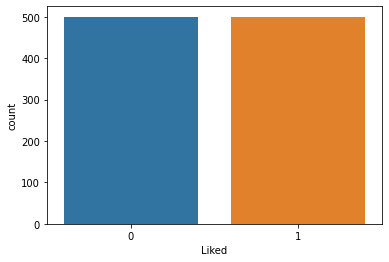

In [6]:
import seaborn as sns
sns.countplot(x='Liked', data=df)

## Cleaning the texts

In [7]:
import re
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
corpus = []
for i in range(0, 1000):
  review = re.sub('[^a-zA-Z]', ' ', dataset['Review'][i])
  review = review.lower()
  review = review.split()
  ps = PorterStemmer()
  all_stopwords = stopwords.words('english')
  all_stopwords.remove('not')
  review = [ps.stem(word) for word in review if not word in set(all_stopwords)]
  review = ' '.join(review)
  corpus.append(review)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [8]:
print(corpus)

['wow love place', 'crust not good', 'not tasti textur nasti', 'stop late may bank holiday rick steve recommend love', 'select menu great price', 'get angri want damn pho', 'honeslti tast fresh', 'potato like rubber could tell made ahead time kept warmer', 'fri great', 'great touch', 'servic prompt', 'would not go back', 'cashier care ever say still end wayyy overpr', 'tri cape cod ravoli chicken cranberri mmmm', 'disgust pretti sure human hair', 'shock sign indic cash', 'highli recommend', 'waitress littl slow servic', 'place not worth time let alon vega', 'not like', 'burritto blah', 'food amaz', 'servic also cute', 'could care less interior beauti', 'perform', 'right red velvet cake ohhh stuff good', 'never brought salad ask', 'hole wall great mexican street taco friendli staff', 'took hour get food tabl restaur food luke warm sever run around like total overwhelm', 'worst salmon sashimi', 'also combo like burger fri beer decent deal', 'like final blow', 'found place accid could not

## Creating the Bag of Words model

In [9]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(max_features=200)
X = cv.fit_transform(corpus).toarray()
y = dataset.iloc[:, -1].values
pos=0
neg=0
for i in range(0,1000):
  if(y[i]==0):
    pos=pos+1
  else:
    neg=neg+1
print(pos)    
print(neg)

500
500


## Splitting the dataset into the Training set and Test set

In [10]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 0)

## Training the Naive Bayes model on the Training set

In [11]:
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier.fit(X_train, y_train)

GaussianNB()

In [12]:
y_pred = classifier.predict(X_test)

In [13]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[37 60]
 [10 93]]


0.65

# Training on Simple Logistic Regression





In [14]:
from sklearn.linear_model import LogisticRegression
classifier2 = LogisticRegression(random_state = 0)
classifier2.fit(X_train, y_train)
y_pred2 = classifier2.predict(X_test)

In [15]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred2)

[[37 60]
 [10 93]]


0.76

# Training on SVM


In [16]:
from sklearn.svm import SVC
classifier3 = SVC(kernel = 'linear', random_state = 0)
classifier3.fit(X_train, y_train)
y_pred3 = classifier3.predict(X_test)

In [17]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred3)

[[37 60]
 [10 93]]


0.73

# Training On Decision Tree

In [18]:
from sklearn.tree import DecisionTreeClassifier
classifier4 = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
classifier4.fit(X_train, y_train)
y_pred4 = classifier4.predict(X_test) 

In [19]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred4)

[[37 60]
 [10 93]]


0.725

In [20]:
from sklearn.ensemble import RandomForestClassifier
classifier5 = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)
classifier5.fit(X_train, y_train)
y_pred5 = classifier5.predict(X_test)

In [21]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred5)

[[37 60]
 [10 93]]


0.73

# Training on Multinomial Nb

In [22]:
from sklearn.naive_bayes import MultinomialNB
classifier6 = MultinomialNB()
classifier6.fit(X_train, y_train)
y_pred6 = classifier6.predict(X_test)

In [23]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred6)

[[37 60]
 [10 93]]


0.77

In [24]:
import pickle 
pickle.dump(classifier3, open('multi_pickle.p', 'wb'))

In [25]:
filename = "count_vec.p"

with open(filename, 'wb') as fout:
    pickle.dump((cv), fout)

In [26]:
## Multinomial NB has high accuracy score 

Multinomial NB has higher accuracy score

In [27]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred6))

              precision    recall  f1-score   support

           0       0.75      0.79      0.77        97
           1       0.79      0.75      0.77       103

    accuracy                           0.77       200
   macro avg       0.77      0.77      0.77       200
weighted avg       0.77      0.77      0.77       200



In [28]:
dataset['corpus'] = corpus
dataset

,Review,Liked,corpus
0,Wow... Loved this place.,1,wow love place
1,Crust is not good.,0,crust not good
2,Not tasty and the texture was just nasty.,0,not tasti textur nasti
3,Stopped by during the late May bank holiday of...,1,stop late may bank holiday rick steve recommen...
4,The selection on the menu was great and so wer...,1,select menu great price
...,...,...,...
995,I think food should have flavor and texture an...,0,think food flavor textur lack
996,Appetite instantly gone.,0,appetit instantli gone
997,Overall I was not impressed and would not go b...,0,overal not impress would not go back
998,"The whole experience was underwhelming, and I ...",0,whole experi underwhelm think go ninja sushi n...


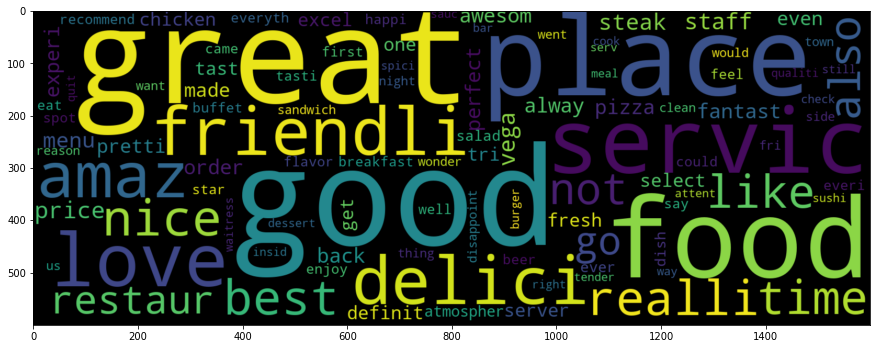

In [29]:
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import re
from PIL import Image

wc = WordCloud(max_words=100, width=1600, height=600, stopwords=all_stopwords).generate(" ".join(dataset[dataset.Liked==1].corpus))

plt.figure(figsize=(15,15))
plt.imshow(wc,interpolation = "bilinear")
plt.show()

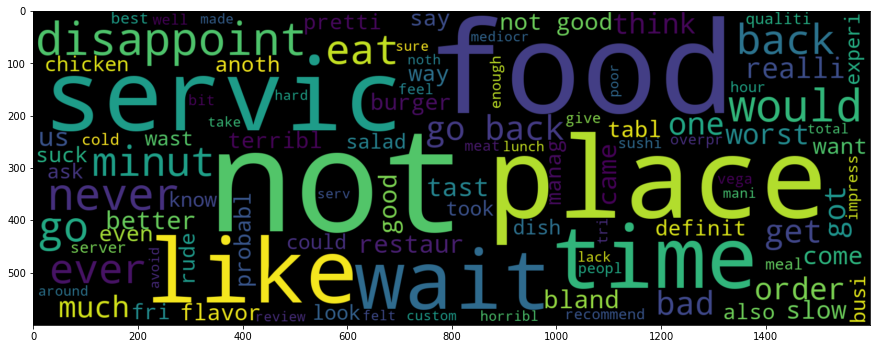

In [30]:
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import re
from PIL import Image

wc = WordCloud(max_words=100, width=1600, height=600, stopwords=all_stopwords).generate(" ".join(dataset[dataset.Liked==0].corpus))

plt.figure(figsize=(15,15))
plt.imshow(wc,interpolation = "bilinear")
plt.show()